In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackbact as tb
import plotbact as pb

# Load the data

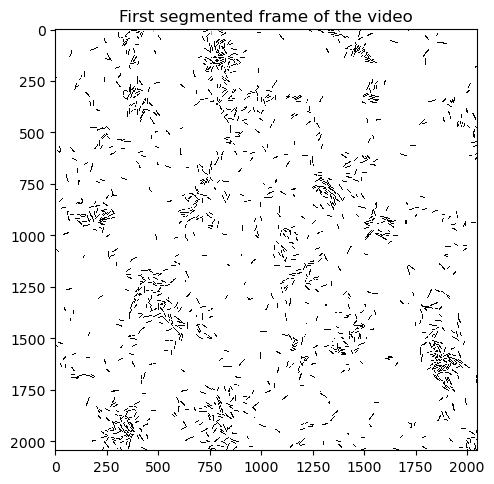

2044 2048


In [2]:
file_name="PilG_dilute_segmented.tif"
im=tb.load_tif(file_name, show=True)
tifdim1=im.shape[1]
tifdim2=im.shape[2]
print(tifdim1, tifdim2)

# Fit ellipses to the contours

Finding the contours of the bacteria...: 100%|██████████████████████████████████████| 241/241 [00:01<00:00, 189.34it/s]


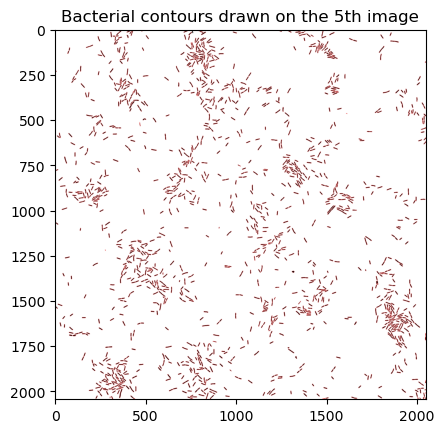

Fitting ellipses to the contours...: 100%|███████████████████████████████████████████| 241/241 [00:04<00:00, 49.39it/s]


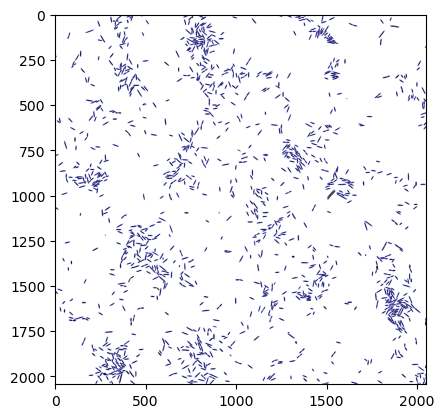

In [3]:
fitted_ellipses=tb.fit_ellipses(im, show_nth_frame=5, filter_max=(10,70))

# Format the data and plot the distribution of alignment angles

,x,y,frame,major_axis_size,minor_axis_size,body_angle
0,1482.860840,2042.499390,0,15.476563,2.687370,85.617630
1,2002.701538,2040.807129,0,6.834268,3.987850,152.039047
2,2042.614868,2039.459717,0,10.293874,3.727504,158.551590
3,1500.558716,2038.583130,0,19.792843,4.811982,77.017342
4,749.539246,2038.037964,0,19.760757,4.225692,113.168434
...,...,...,...,...,...,...
352372,1373.018433,7.225316,240,22.937532,5.621452,129.656830
352373,758.098083,17.038513,240,41.172260,4.474024,171.752777
352374,569.943909,0.389502,240,6.513364,2.771308,111.506134
352375,416.537018,6.087779,240,20.288712,5.221791,54.882519


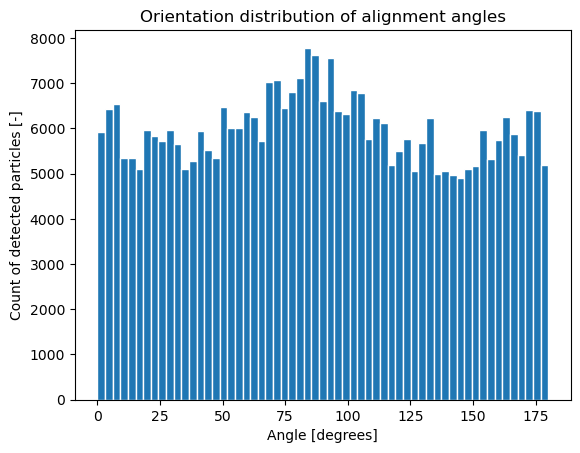

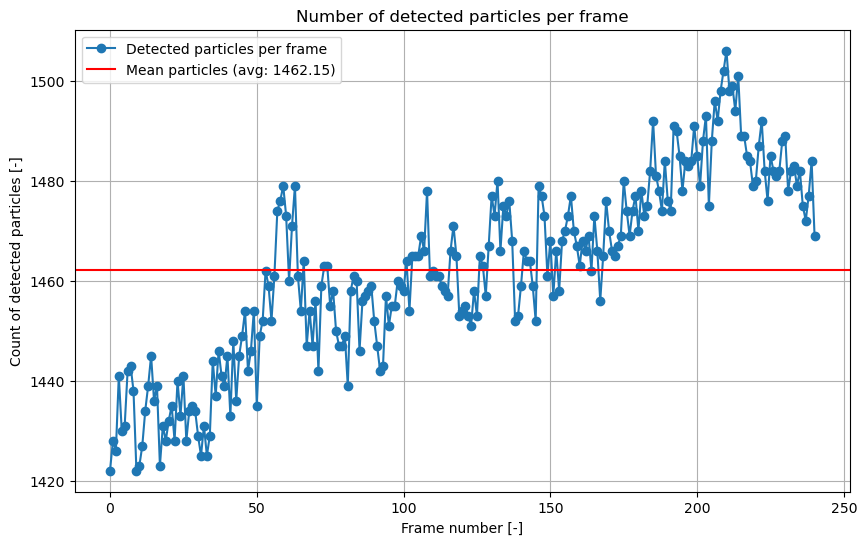

In [4]:
#format the fitted ellipses into a dataframe for tracking
ellipses_df=tb.format_ellipses(fitted_ellipses)
display(ellipses_df)

#For PIV analysis: Uncomment below to transform ellipses into single points
#tb.ellipse_to_particle(im, file_name, ellipses_df)


plt.hist(ellipses_df["body_angle"], bins=59, histtype='bar', ec='white')
plt.title("Orientation distribution of alignment angles")
plt.xlabel('Angle [degrees]')
plt.ylabel('Count of detected particles [-]')
plt.show()

# Count the number of particles per frame
particles_per_frame = ellipses_df.groupby('frame').size()

# Calculate the mean number of particles across all frames
mean_particles = particles_per_frame.mean()

# Plotting the number of detected particles per frame
plt.figure(figsize=(10,6))
plt.plot(particles_per_frame.index, particles_per_frame.values, marker='o', label='Detected particles per frame')  # Use plt.bar for a bar chart

# Plotting the mean number of particles as a horizontal line
plt.axhline(y=mean_particles, color='r', linestyle='-', label=f'Mean particles (avg: {mean_particles:.2f})')

# Adding titles and labels
plt.title('Number of detected particles per frame')
plt.xlabel('Frame number [-]')
plt.ylabel('Count of detected particles [-]')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

In [5]:
import trackpy.diag
trackpy.diag.performance_report()

Yes, but could it be faster?
FAST: numba is available and enabled (fast subnets and feature-finding).


# Track the bacteria and write the results to disk

In [6]:
traj_tp = tb.track_bacteria(ellipses_df, max_search_range=10, min_search_range=2, filter=30)
display(traj_tp)
tb.write_trajectory(traj_tp, file_name)

Frame 240: 1469 trajectories present.


,particle,count
0,1390,241
1,1286,241
2,700,241
3,701,241
4,1284,241
...,...,...
1978,1791,31
1979,174,31
1980,5731,31
1981,7707,31


,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,794.072937,739.188782,0,28.083838,4.780637,37.538197,1
1,792.291687,741.196106,1,28.194952,4.920062,39.474445,1
2,792.231018,741.562378,2,28.556999,5.063913,40.827843,1
3,790.895996,742.983459,3,29.312344,4.885184,40.522236,1
4,788.973145,745.287720,4,29.488760,5.112142,39.035942,1
...,...,...,...,...,...,...,...
311013,738.415527,1726.980103,236,19.708015,4.572733,153.833725,8910
311014,738.497742,1727.017090,237,20.279699,4.397583,153.970032,8910
311015,738.415527,1726.980103,238,19.708015,4.572733,153.833725,8910
311016,738.464905,1726.791626,239,19.900505,4.372700,152.741898,8910


# Load the results of the tracking

In [7]:
traj_loaded=tb.read_trajectory(file_name)
display(traj_loaded)

,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,794.072937,739.188782,0,28.083838,4.780637,37.538197,1
1,792.291687,741.196106,1,28.194952,4.920062,39.474445,1
2,792.231018,741.562378,2,28.556999,5.063913,40.827843,1
3,790.895996,742.983459,3,29.312344,4.885184,40.522236,1
4,788.973145,745.287720,4,29.488760,5.112142,39.035942,1
...,...,...,...,...,...,...,...
311013,738.415527,1726.980103,236,19.708015,4.572733,153.833725,8910
311014,738.497742,1727.017090,237,20.279699,4.397583,153.970032,8910
311015,738.415527,1726.980103,238,19.708015,4.572733,153.833725,8910
311016,738.464905,1726.791626,239,19.900505,4.372700,152.741898,8910


# Plot trajectories

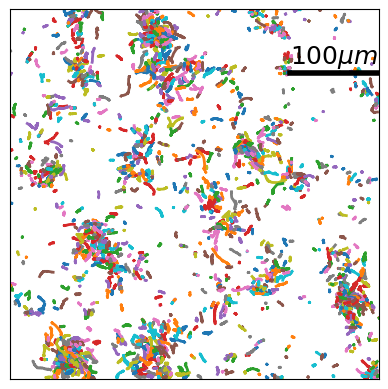

In [8]:
pb.plot_traj_all(traj_loaded, imdim1=tifdim1, imdim2=tifdim2, pix_size=0.1625)

# Calculate the kinematic parameters such as velocity and acceleration etc.

In [9]:
particle_params=tb.calculate_kinematic_parameters(traj_tp, time_step=1)

display(particle_params)


tb.write_kinematics(particle_params, file_name)

100%|█████████████████████████████████████████████████████████████████████████████| 1983/1983 [00:15<00:00, 124.99it/s]


,x [um],y [um],frame,major_axis_size [um],minor_axis_size [um],body_angle [degrees],particle,vx [um/s],vy [um/s],vel [um/s],ax [um/s^2],ay [um/s^2],acc [um/s^2],diff_body_angle [degrees],angular_vel [degrees/s],angular_acc [degrees/s^2]
0,129.036852,120.118177,0,4.563624,0.776853,37.538197,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.747399,120.444367,1,4.581680,0.799510,39.474445,1,-0.289453,0.326190,0.436100,NaN,NaN,NaN,1.936249,NaN,NaN
2,128.737540,120.503886,2,4.640512,0.822886,40.827843,1,-0.009859,0.059519,0.060330,0.279594,-0.266671,0.386376,1.353397,-0.582851,NaN
3,128.520599,120.734812,3,4.763256,0.793842,40.522236,1,-0.216941,0.230926,0.316844,-0.207082,0.171407,0.268818,-0.305607,-1.659004,-1.076153
4,128.208136,121.109254,4,4.791923,0.830723,39.035942,1,-0.312463,0.374442,0.487689,-0.095522,0.143517,0.172399,-1.486294,-1.180687,0.478317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311013,119.992523,280.634267,236,3.202553,0.743069,153.833725,8910,0.002668,0.030072,0.030190,-0.014560,0.020293,0.024976,1.486343,0.959473,2.003098
311014,120.005883,280.640277,237,3.295451,0.714607,153.970032,8910,0.013360,0.006010,0.014650,0.010692,-0.024062,0.026330,0.136307,-1.350037,-2.309509
311015,119.992523,280.634267,238,3.202553,0.743069,153.833725,8910,-0.013360,-0.006010,0.014650,-0.026720,-0.012021,0.029299,-0.136307,-0.272614,1.077423
311016,120.000547,280.603639,239,3.233832,0.710564,152.741898,8910,0.008024,-0.030627,0.031661,0.021384,-0.024617,0.032608,-1.091827,-0.955521,-0.682907


# Data analysis

To perform the analyse there is no need to run again all the code above but just need to load the _kinetimatic csv dataframes available on the goggle drive.

,x [um],y [um],frame,major_axis_size [um],minor_axis_size [um],body_angle [degrees],particle,vx [um/s],vy [um/s],vel [um/s],ax [um/s^2],ay [um/s^2],acc [um/s^2],diff_body_angle [degrees],angular_vel [degrees/s],angular_acc [degrees/s^2]
0,129.036852,120.118177,0,4.563624,0.776853,37.538197,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.747399,120.444367,1,4.581680,0.799510,39.474445,1,-0.289453,0.326190,0.436100,NaN,NaN,NaN,1.936249,NaN,NaN
2,128.737540,120.503886,2,4.640512,0.822886,40.827843,1,-0.009859,0.059519,0.060330,0.279594,-0.266671,0.386376,1.353397,-0.582851,NaN
3,128.520599,120.734812,3,4.763256,0.793842,40.522236,1,-0.216941,0.230926,0.316844,-0.207082,0.171407,0.268818,-0.305607,-1.659004,-1.076153
4,128.208136,121.109254,4,4.791923,0.830723,39.035942,1,-0.312463,0.374442,0.487689,-0.095522,0.143517,0.172399,-1.486294,-1.180687,0.478317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311013,119.992523,280.634267,236,3.202553,0.743069,153.833725,8910,0.002668,0.030072,0.030190,-0.014560,0.020293,0.024976,1.486343,0.959473,2.003098
311014,120.005883,280.640277,237,3.295451,0.714607,153.970032,8910,0.013360,0.006010,0.014650,0.010692,-0.024062,0.026330,0.136307,-1.350037,-2.309509
311015,119.992523,280.634267,238,3.202553,0.743069,153.833725,8910,-0.013360,-0.006010,0.014650,-0.026720,-0.012021,0.029299,-0.136307,-0.272614,1.077423
311016,120.000547,280.603639,239,3.233832,0.710564,152.741898,8910,0.008024,-0.030627,0.031661,0.021384,-0.024617,0.032608,-1.091827,-0.955521,-0.682907


Indexation of Groups (particles) and their reversals:
       Particle  Reversals
Index                     
0             1         77
1             2        112
2             3         90
3             5         85
4             6         94
...         ...        ...
1978       8863         19
1979       8873          5
1980       8874         11
1981       8889         21
1982       8910         11

[1983 rows x 2 columns]

Total number of unique particles: 1983

Average number of reversals: 58.115481593545134
Standard deviation of reversals: 37.92013591387934


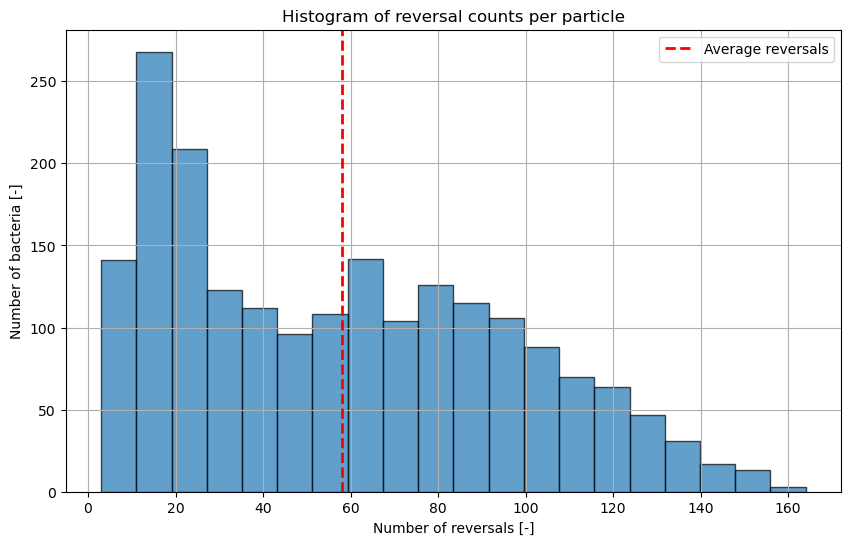

In [10]:
#To quantify reversal
loaded_params=tb.read_kinematics(file_name)
display(loaded_params)
pb.plot_reversals(loaded_params)

Mean velocities for each particle:
           vx [um/s]  vy [um/s]  vel [um/s]
particle                                  
1         -0.010598   0.037186    0.119534
2          0.011017   0.006281    0.098822
3         -0.005167   0.018267    0.085789
5         -0.010456  -0.011628    0.097603
6         -0.002969   0.003409    0.095172
...             ...        ...         ...
8863       0.036647   0.020107    0.210469
8873       0.020329   0.031184    0.121880
8874      -0.002319  -0.011244    0.065595
8889      -0.025293   0.043980    0.147544
8910       0.027994   0.045360    0.250166

[1983 rows x 3 columns]
Standard deviations for each particle:
           vx [um/s]  vy [um/s]  vel [um/s]
particle                                  
1          0.108333   0.122034    0.117395
2          0.112411   0.069435    0.088388
3          0.033079   0.112032    0.081344
5          0.113490   0.057137    0.082607
6          0.112879   0.075367    0.096678
...             ...        ...         

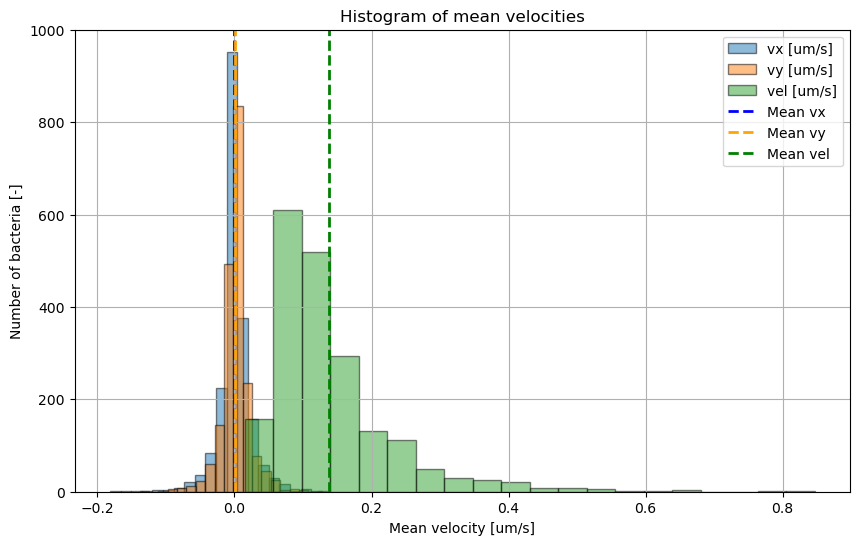

In [11]:
pb.plot_mean_velocities(loaded_params)

Total distance for each particle:
 particle
1       28.688246
2       23.717286
3       20.589305
5       23.424698
6       22.841383
          ...    
8863     6.735011
8873     3.900170
8874     2.099047
8889     4.721409
8910     7.755139
Name: distance, Length: 1983, dtype: float64
Mean trajectory length: 18.22315644149369
Standard deviation of trajectory length: 11.191566790191157


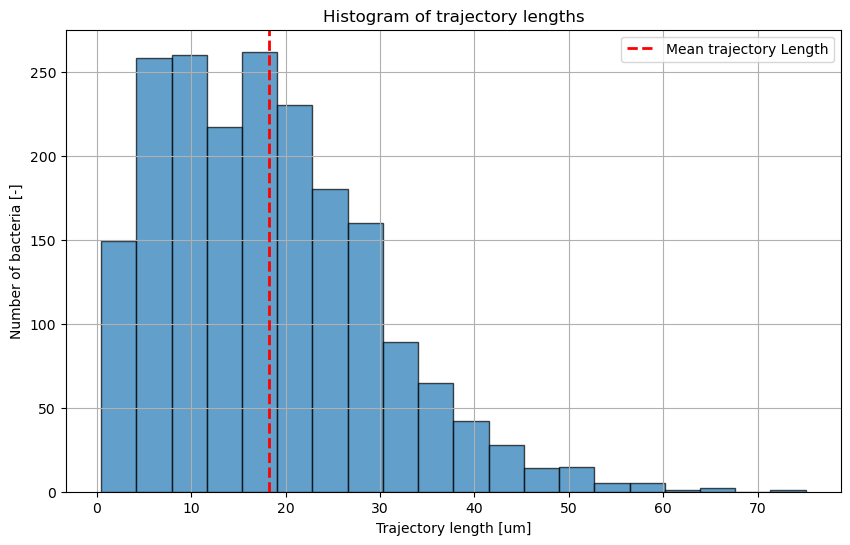

In [12]:
pb.plot_traj_length(loaded_params)

End-to-end trajectory length for each particle:
 particle
1       9.280131
2       3.043575
3       4.556051
5       3.753061
6       1.084885
          ...   
8863    1.337621
8873    1.191203
8874    0.367372
8889    1.623490
8910    1.652380
Length: 1983, dtype: float64
Mean end-to-end trajectory length: 2.717197126138597
Standard deviation of end-to-end trajectory length: 2.9363287671361507


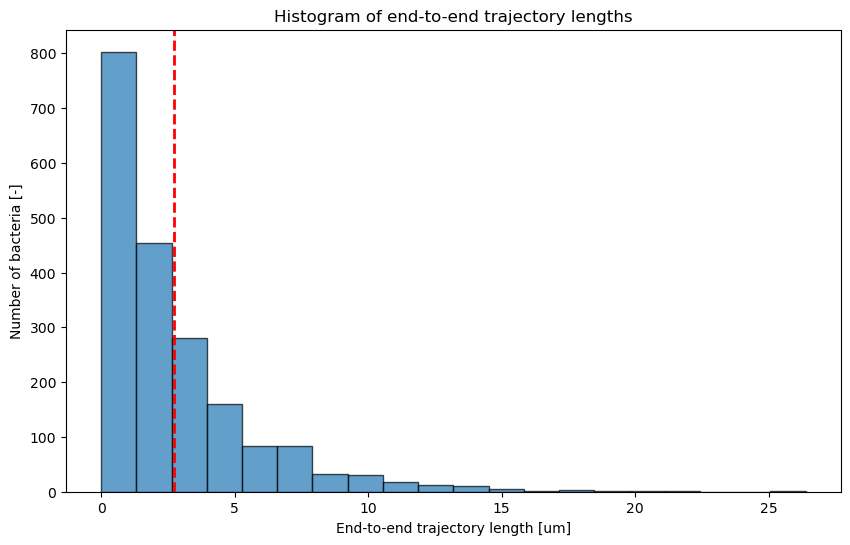

In [13]:
pb.plot_traj_end_to_end_lentgth(loaded_params)